In [1]:
import gym
import numpy as np


In [2]:
maxi = [3, 3, 5.1, 5.1, 3.3, 5.1, 1, 1] 
mini = [-1.7, -1.7, -5.1, -5.1, -3.3, -5.1, 0, 0]
my_bin = [5, 5, 5, 5, 5, 5, 2, 2]

In [3]:
maxi = [1.5, 1.5, 5, 5, 3.14, 5, 1, 1] 
mini = [-1.5, -1.5, -5, -5, -3.14, -5, 0, 0]
my_bin = [8, 8, 5, 5, 5, 5, 2, 2]
#my_bin = [5, 5, 5, 5, 5, 5, 2, 2]

In [4]:
env = gym.make("LunarLander-v2")
observation = env.reset(seed=20, return_info=False)

C:\Anaconda\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Anaconda\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
test = np.array([-1.6,  1.3999956 , -0.3203935 , -0.48554128,  0.00367194,
        0.072574  ,  0.        ,  0.        ])

In [6]:
def get_discrete_state(obs):
    
    obs = [min(elem_maxi, elem_obs) for elem_obs, elem_maxi in zip(obs, maxi)]
    
    obs = [max(elem_mini, elem_obs) for elem_obs, elem_mini in zip(obs, mini)]
    
    res = np.int64(np.floor(0.99*np.array(my_bin)*(obs-np.array(mini))/(np.array(maxi)-np.array(mini))))
    return res   

In [7]:
res =get_discrete_state(test)

In [8]:
q_table = np.random.uniform(low=0, high=1, size=(my_bin + [env.action_space.n]))
q_table.shape

(8, 8, 5, 5, 5, 5, 2, 2, 4)

In [9]:
LEARNING_RATE = 0.15

DISCOUNT = 0.995
EPISODES = 2000
total = 0
total_reward = 0
prior_reward = 0


epsilon = 1 # Taux d'apprentissage

epsilon_decay_value = 0.99995

In [10]:
import time
import math
rewards = []
cpt_step = 0
for episode in range(EPISODES + 1): #go through the episodes
    print(cpt_step)
    cpt_step = 0
    print(episode)
    t0 = time.time() #set the initial time
    discrete_state = get_discrete_state(env.reset()) # get the discrete start for the restarted environment 
    done = False
    episode_reward = 0 # reward starts as 0 for each episode

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 
        

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) #take cordinated action
        else:

            action = np.random.randint(0, env.action_space.n) # do a random action

        new_state, reward, done, _ = env.step(action) # step action to get new states, reward, and the "done" status.
        cpt_step += 1
        episode_reward += reward # add the reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % 2000 == 0: # render
            env.render()

        if not done: # update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[np.array(list(discrete_state) + [action])]
            
            #q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[np.array(list(discrete_state) + [action])] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.01: # epsilon modification
       # if episode_reward > prior_reward and episode > 10000: 
        if episode > 10000:
            epsilon *= 1 - math.pow(5, -6);
            #epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() # episode has finished
    episode_total = t1 - t0 # episode total time
    total = total + episode_total

    total_reward += episode_reward # episode total reward
    prior_reward = episode_reward
    rewards.append(episode_reward)
    if episode % 3 == 0: # every 1000 episodes print the average time and the average reward
        mean = total / 3
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 3
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

C:\Anaconda\lib\site-packages\gym\core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


0
0
Episode: 0
Time Average: 0.5511739253997803
Mean Reward: -96.88004126388819
73
1
85
2
87
3
Time Average: 0.7499821186065674
Mean Reward: -193.2784490665239
70
4
58
5
120
6
Time Average: 0.8958349227905273
Mean Reward: -109.12682627192255
101
7
70
8
88
9
Time Average: 0.8239458401997884
Mean Reward: -122.8874323755076
90
10
85
11
120
12
Time Average: 0.9353236357371012
Mean Reward: -372.5327413541577
96
13
79
14
126
15
Time Average: 0.9503229459126791
Mean Reward: -145.19495111687522
89
16
113
17
92
18
Time Average: 0.9893329938252767
Mean Reward: -179.2460767505967
115
19
70
20
76
21
Time Average: 0.7054156462351481
Mean Reward: -136.64043369894114
70
22
85
23
64
24
Time Average: 0.8253474235534668
Mean Reward: -180.49243263310032
94
25
73
26
63
27
Time Average: 0.7180186112721761
Mean Reward: -74.06891194695982
68
28
71
29
121
30
Time Average: 0.9463495413462321
Mean Reward: -193.76733126661065
95
31
88
32
145
33
Time Average: 1.039334774017334
Mean Reward: -170.76214119465803
74


116
284
98
285
Time Average: 1.1052272319793701
Mean Reward: -255.66727270911335
121
286
110
287
77
288
Time Average: 0.8557593822479248
Mean Reward: -172.97404839565283
76
289
95
290
104
291
Time Average: 0.9323413372039795
Mean Reward: -258.2766808064191
94
292
61
293
120
294
Time Average: 0.8143487771352133
Mean Reward: -232.34910968459099
75
295
137
296
97
297
Time Average: 0.9461177984873453
Mean Reward: -108.46994456273966
64
298
153
299
123
300
Time Average: 1.29168701171875
Mean Reward: -160.12570335764232
118
301
121
302
109
303
Time Average: 1.239196538925171
Mean Reward: -249.67995088901148
131
304
72
305
98
306
Time Average: 0.8357977072397867
Mean Reward: -146.11897987823656
90
307
65
308
74
309
Time Average: 0.7303029696146647
Mean Reward: -215.3312444313914
87
310
92
311
108
312
Time Average: 1.0019997755686443
Mean Reward: -193.2442304504431
114
313
91
314
139
315
Time Average: 1.1345821221669514
Mean Reward: -152.68581619474847
122
316
94
317
133
318
Time Average: 1.01

104
566
74
567
Time Average: 0.8446722030639648
Mean Reward: -249.80458171784736
89
568
116
569
121
570
Time Average: 1.189517895380656
Mean Reward: -192.27709991377426
84
571
92
572
84
573
Time Average: 0.9183446566263834
Mean Reward: -95.57426947102635
106
574
109
575
101
576
Time Average: 1.0000406901041667
Mean Reward: -306.4838560433264
92
577
85
578
114
579
Time Average: 1.0292893250783284
Mean Reward: -198.82786010934356
125
580
110
581
124
582
Time Average: 1.0260414282480876
Mean Reward: -304.6149954931628
93
583
71
584
102
585
Time Average: 0.8227944374084473
Mean Reward: -128.5649487800063
85
586
86
587
115
588
Time Average: 0.8804890314737955
Mean Reward: -148.22978653846542
74
589
118
590
118
591
Time Average: 1.1466724077860515
Mean Reward: -224.07753477479602
107
592
116
593
75
594
Time Average: 0.8276869455973307
Mean Reward: -216.22102833101565
68
595
79
596
82
597
Time Average: 0.9056812127431234
Mean Reward: -138.01703702223375
124
598
89
599
64
600
Time Average: 0.7

91
848
78
849
Time Average: 0.930457592010498
Mean Reward: -278.6101600611275
120
850
67
851
81
852
Time Average: 0.8593219121297201
Mean Reward: -190.17752768000696
120
853
85
854
86
855
Time Average: 0.8703412214914957
Mean Reward: -206.07696463402166
101
856
86
857
99
858
Time Average: 0.9033471743265787
Mean Reward: -196.04917458685188
82
859
82
860
70
861
Time Average: 0.7226819197336832
Mean Reward: -179.85301283794584
74
862
82
863
87
864
Time Average: 0.7376731236775717
Mean Reward: -154.98372613880608
63
865
94
866
68
867
Time Average: 0.7841792106628418
Mean Reward: -160.6584150763916
78
868
77
869
88
870
Time Average: 0.8588294188181559
Mean Reward: -150.706819227572
106
871
82
872
66
873
Time Average: 0.8025836149851481
Mean Reward: -144.6779389292397
99
874
82
875
90
876
Time Average: 0.8330289522806803
Mean Reward: -172.52940743626834
86
877
73
878
96
879
Time Average: 0.8538095156351725
Mean Reward: -130.01566915296314
76
880
101
881
58
882
Time Average: 0.86462187767028

90
1127
87
1128
Time Average: 0.7908370494842529
Mean Reward: -257.1580719804048
66
1129
69
1130
70
1131
Time Average: 0.8300201098124186
Mean Reward: -163.3912780550134
116
1132
81
1133
79
1134
Time Average: 0.7639739513397217
Mean Reward: -140.57234594338698
75
1135
74
1136
90
1137
Time Average: 0.7808680534362793
Mean Reward: -151.66508909059255
77
1138
70
1139
109
1140
Time Average: 1.0013410250345867
Mean Reward: -203.58985390538024
114
1141
109
1142
99
1143
Time Average: 0.9108374913533529
Mean Reward: -184.29032236438843
65
1144
86
1145
95
1146
Time Average: 0.8900016148885092
Mean Reward: -188.2722690303044
89
1147
153
1148
61
1149
Time Average: 1.2588579654693604
Mean Reward: -62.89441664402775
170
1150
101
1151
72
1152
Time Average: 0.8371688524881998
Mean Reward: -203.14099612143386
83
1153
98
1154
77
1155
Time Average: 0.8493187427520752
Mean Reward: -295.76104267217784
74
1156
134
1157
106
1158
Time Average: 1.2012205123901367
Mean Reward: -240.00367986172273
123
1159
115


95
1400
71
1401
Time Average: 1.3189592361450195
Mean Reward: -192.02014977584284
80
1402
67
1403
66
1404
Time Average: 1.5878992875417073
Mean Reward: -148.1160033026654
108
1405
100
1406
85
1407
Time Average: 2.1411961714426675
Mean Reward: -177.47934303079265
118
1408
139
1409
101
1410
Time Average: 1.3418813546498616
Mean Reward: -152.88959168447352
69
1411
80
1412
85
1413
Time Average: 1.011481523513794
Mean Reward: -126.52851213115268
105
1414
96
1415
110
1416
Time Average: 1.0766716003417969
Mean Reward: -219.6760680442628
84
1417
105
1418
65
1419
Time Average: 0.9423619111378988
Mean Reward: -126.87577685453186
83
1420
121
1421
140
1422
Time Average: 1.255915641784668
Mean Reward: -195.0398538903188
86
1423
84
1424
60
1425
Time Average: 0.8124392827351888
Mean Reward: -177.82693657335972
72
1426
63
1427
79
1428
Time Average: 0.8341615200042725
Mean Reward: -112.92109363759418
81
1429
99
1430
110
1431
Time Average: 0.9963370164235433
Mean Reward: -190.27280261918796
67
1432
91
1

115
1673
94
1674
Time Average: 1.8243090311686199
Mean Reward: -161.13446073061053
84
1675
82
1676
70
1677
Time Average: 0.9153831799825033
Mean Reward: -150.4481047491517
83
1678
109
1679
73
1680
Time Average: 1.070454994837443
Mean Reward: -123.33020471763821
88
1681
106
1682
119
1683
Time Average: 1.6407957077026367
Mean Reward: -159.49427227481405
156
1684
84
1685
80
1686
Time Average: 1.0058772563934326
Mean Reward: -186.81599138960743
113
1687
104
1688
68
1689
Time Average: 0.9443315664927164
Mean Reward: -190.122493127363
90
1690
65
1691
101
1692
Time Average: 1.2075592676798503
Mean Reward: -195.9162066629067
155
1693
90
1694
102
1695
Time Average: 1.091388463973999
Mean Reward: -230.88637762093018
94
1696
114
1697
75
1698
Time Average: 0.977091391881307
Mean Reward: -253.45331981179137
76
1699
120
1700
70
1701
Time Average: 1.0423141320546467
Mean Reward: -164.71849547276406
101
1702
78
1703
130
1704
Time Average: 1.0802724361419678
Mean Reward: -226.37549410488216
85
1705
86


82
1946
85
1947
Time Average: 0.8777727286020914
Mean Reward: -107.90130350055533
81
1948
75
1949
94
1950
Time Average: 0.9823397000630697
Mean Reward: -200.90467777887793
110
1951
73
1952
116
1953
Time Average: 1.0855778058369954
Mean Reward: -186.98477979255327
100
1954
129
1955
67
1956
Time Average: 1.0016559759775798
Mean Reward: -233.86445195989154
87
1957
72
1958
80
1959
Time Average: 0.8565820058186849
Mean Reward: -179.54163458742013
90
1960
82
1961
79
1962
Time Average: 0.8367687066396078
Mean Reward: -211.9174646263701
75
1963
87
1964
122
1965
Time Average: 1.1690252621968586
Mean Reward: -216.1483028439844
121
1966
65
1967
138
1968
Time Average: 1.1055458386739094
Mean Reward: -226.84243432293556
85
1969
99
1970
79
1971
Time Average: 1.0121556917826335
Mean Reward: -202.66428041658642
92
1972
96
1973
91
1974
Time Average: 1.021741549173991
Mean Reward: -158.99868828978256
95
1975
100
1976
96
1977
Time Average: 1.148413101832072
Mean Reward: -287.8870032590899
120
1978
123
19

In [11]:
env.close()

In [15]:
tmp = pd.DataFrame({'rewards': rewards, 'discount' : DISCOUNT, 'learning rate' : LEARNING_RATE})

In [18]:
tmp['iteration'] = tmp.index

In [16]:
import seaborn as sns 

<AxesSubplot:xlabel='iteration', ylabel='rewards'>

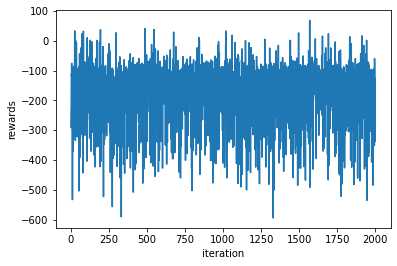

In [19]:
sns.lineplot(data=tmp, x= 'iteration', y='rewards')

In [12]:
import pandas as pd

In [13]:
pd.DataFrame({'rewards': rewards, 'discount' : DISCOUNT, 'learning rate' : LEARNING_RATE}).to_csv('rewards.csv')